## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import rand_score, adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import fowlkes_mallows_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score

from sklearn.datasets import load_iris
from sklearn.cluster import k_means, KMeans, Birch, DBSCAN, OPTICS, mean_shift, KMeans, MeanShift
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

from warnings import filterwarnings
filterwarnings('ignore')

# <center> Metrics for Clustering Methods </font> </center>

### External Metrics

In [2]:
data = load_iris()

In [3]:
XX = data['data']
yy = data['target']

In [4]:
y = np.array([0, 0, 0, 5, 5, 5, 2, 2, 2, 2])

yhat = np.array([0, 0, 0, 0, 1, 1, 2, 2, 2, 2])

In [5]:
RI  = rand_score(y, yhat)
ARI = adjusted_rand_score(y, yhat)

In [6]:
print(RI)
print(ARI)

0.8888888888888888
0.7232472324723247


In [7]:
MI  = mutual_info_score(y, yhat)
NMI = normalized_mutual_info_score(y, yhat)
AMI = adjusted_mutual_info_score(y, yhat)

In [8]:
print(MI)
print(NMI)
print(AMI)

0.8639659174977006
0.8060059704030482
0.7347541445436012


In [9]:
HS = homogeneity_score(y, yhat)
CS = completeness_score(y, yhat)
V  = v_measure_score(y, yhat, beta=0.1)

In [10]:
print(HS)
print(CS)
print(V)

0.7934300092382587
0.8189870131566658
0.7956872747795687


In [11]:
HCV = homogeneity_completeness_v_measure(y, yhat)

In [12]:
print(HCV)

(0.7934300092382587, 0.8189870131566658, 0.8060059704030482)


In [13]:
FMI = fowlkes_mallows_score(y, yhat)

In [14]:
print(FMI)

0.8006407690254357


In [15]:
CHI = calinski_harabasz_score(XX, yy)

In [16]:
print(CHI)

487.33087637489984


In [17]:
DB = davies_bouldin_score(XX, yy)

In [18]:
print(DB)

0.7513707094756764


### Test

In [19]:
km = KMeans(n_clusters=3, random_state=2023).fit(XX)

In [20]:
#km_lab = km[1]
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [21]:
CHI2 = calinski_harabasz_score(XX, yy)

In [22]:
print(CHI2)

487.33087637489984


In [23]:
ms = MeanShift(bandwidth=0.85).fit(XX)

In [24]:
ms_labs = ms.labels_

In [25]:
CHI3 = calinski_harabasz_score(XX, ms_labs)

In [26]:
print(CHI3)

560.1394503001885


### Tabla Comparativa

In [27]:
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Algoritmos de clustering a comparar

km = KMeans(n_clusters=3, random_state=2023)
ms = MeanShift(bandwidth=0.85)
bi = Birch(n_clusters=3)
sp = SpectralClustering(n_clusters=3, affinity='rbf', gamma=1.0)
ah = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [29]:
methods = [km, ms, sp, bi, ah]
names   = ['K-means', 'Mean-Shift', 'Spectral', 'Birch', 'Agglomerative']
metrics = [rand_score, adjusted_rand_score, 
           mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score, 
           homogeneity_score, completeness_score, v_measure_score, 
           fowlkes_mallows_score, calinski_harabasz_score]
metr_names = ['RI','ARI','MI','NMI','AMI','H','C','V','FMI','CHI']

In [30]:
n = len(methods)
m = len(metrics)
beta = 1.

In [31]:
yhat = []
Met = np.zeros((m,n))

for i in range(0, n):
    clust = methods[i].fit(XX)
    yhat.append(clust.labels_)
    
    for j in range(0, m):
        if j == 7:
                Met[j,i] = metrics[j](yy, yhat[i], beta=beta)
        elif j == 9:
            Met[j,i] = metrics[j](XX, yhat[i])
        else:
            Met[j,i] = metrics[j](yy, yhat[i])

In [32]:
df = pd.DataFrame(data=Met, index=metr_names, columns=names)

In [33]:
df

,K-means,Mean-Shift,Spectral,Birch,Agglomerative
RI,0.879732,0.885906,0.885906,0.819597,0.879732
ARI,0.730238,0.743683,0.745504,0.609625,0.731199
MI,0.825591,0.835346,0.864524,0.741240,0.835825
NMI,0.758176,0.766036,0.797989,0.705099,0.770084
AMI,0.755119,0.763083,0.795421,0.701217,0.767167
H,0.751485,0.760365,0.786923,0.674706,0.760801
C,0.764986,0.771792,0.809369,0.738360,0.779596
V,0.758176,0.766036,0.797989,0.705099,0.770084
FMI,0.820808,0.829449,0.832050,0.751487,0.822170
CHI,561.627757,560.139450,556.117692,458.472511,558.058041


### Visualización

In [34]:
df.iloc[:-1,:].mean()

K-means          0.782701
Mean-Shift       0.791299
Spectral         0.812853
Birch            0.716270
Agglomerative    0.790740
dtype: float64

In [35]:
U, S, V = np.linalg.svd(XX)
Proj = XX @ V[:,:2]

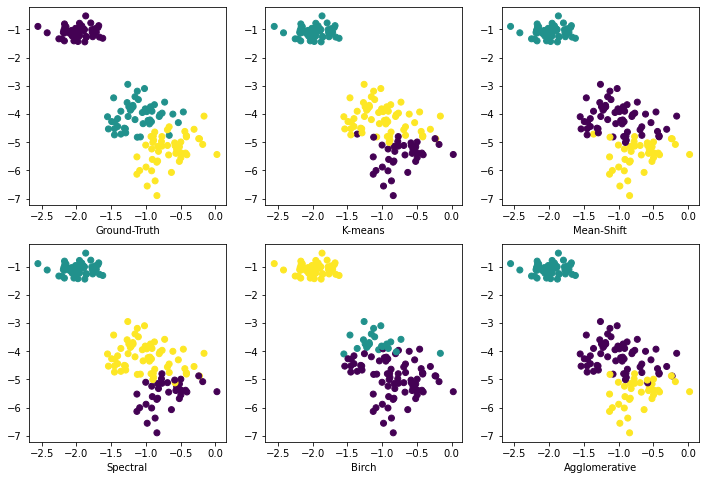

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.xlabel('Ground-Truth')
plt.scatter(Proj[:,0], Proj[:,1], marker='o', c=yy)
for i in range(0, n):
    plt.subplot(2,3,i+2)
    plt.scatter(Proj[:,0], Proj[:,1], marker='o', c=yhat[i])
    plt.xlabel(names[i])
plt.show()

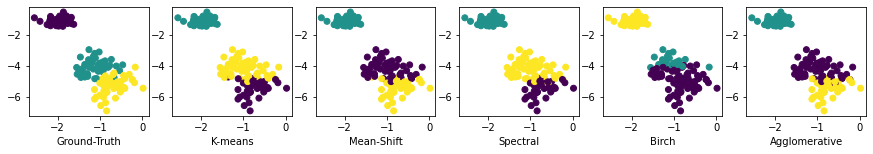

In [37]:
fig = plt.figure(figsize=(15,2))
plt.subplot(1,6,1)
plt.xlabel('Ground-Truth')
plt.scatter(Proj[:,0], Proj[:,1], marker='o', c=yy)
for i in range(0, n):
    plt.subplot(1,6,i+2)
    plt.scatter(Proj[:,0], Proj[:,1], marker='o', c=yhat[i])
    plt.xlabel(names[i])
plt.show()

In [38]:
#fig.savefig('metrics.jpg', bbox_inches=('tight'))

### Internal Metrics

In [39]:
methods = [km, ms, sp, bi, ah]
names   = ['K-means', 'Mean-Shift', 'Spectral', 'Birch', 'Agglomerative']
metrics = [davies_bouldin_score, silhouette_score]
metr_names = ['Davies-Bouldin', 'Silhouette']

In [40]:
n = len(methods)
m = len(metrics)
beta = 1.

In [41]:
yhat = []
Met = np.zeros((m,n))

for i in range(0, n):
    clust = methods[i].fit(XX)
    yhat.append(clust.labels_)
    
    for j in range(0, m):
        Met[j,i] = metrics[j](XX, yhat[i])

In [42]:
df = pd.DataFrame(data=Met, index=metr_names, columns=names)

In [43]:
df

,K-means,Mean-Shift,Spectral,Birch,Agglomerative
Davies-Bouldin,0.661972,0.665852,0.653860,0.625831,0.656256
Silhouette,0.552819,0.551157,0.555306,0.501952,0.554324


### Visualización

In [44]:
df.iloc[:-1,:].mean()

K-means          0.661972
Mean-Shift       0.665852
Spectral         0.653860
Birch            0.625831
Agglomerative    0.656256
dtype: float64